<a href="https://colab.research.google.com/github/Mansihpatel/DeepLearning/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn 


In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [7]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

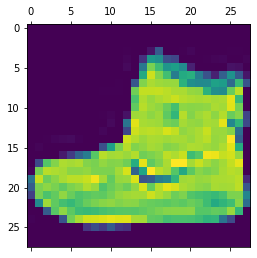

In [9]:
plt.matshow(X_train[0])

In [12]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [17]:
#Scaling 
X_train = X_train/255
X_test=X_test/255

In [23]:
# build model - without hidden layers
model = keras.models.Sequential([
                               keras.layers.Flatten(input_shape=[28,28]),
                               keras.layers.Dense(units=32,activation='relu'),
                               keras.layers.Dense(units=10,activation='softmax')
                               ])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3574 - accuracy: 0.8731
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3416 - accuracy: 0.8767
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3316 - accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3225 - accuracy: 0.8818
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8860


In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3831 - accuracy: 0.8629


[0.383146733045578, 0.8629000186920166]

In [29]:
y_pred = model.predict(X_test)

In [33]:
np.argmax(y_pred[0])

9

In [34]:
y_test[0]

9

In [36]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,[np.argmax(i) for i in y_pred])
cm

array([[860,   4,  25,  31,   2,   1,  69,   0,   7,   1],
       [  1, 972,   0,  22,   1,   0,   2,   0,   2,   0],
       [ 17,   1, 857,  14,  44,   0,  60,   0,   7,   0],
       [ 31,  12,  18, 902,  14,   1,  18,   0,   4,   0],
       [  0,   1, 234,  62, 624,   1,  70,   0,   8,   0],
       [  0,   0,   0,   1,   0, 941,   0,  35,   2,  21],
       [160,   1, 125,  39,  44,   1, 614,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 948,   0,  21],
       [  4,   1,   4,   8,   2,   3,   3,   4, 971,   0],
       [  0,   0,   0,   0,   0,  11,   1,  48,   0, 940]])

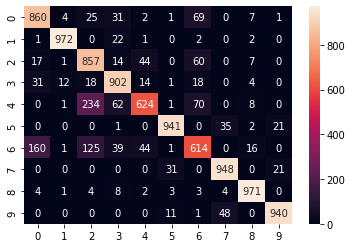

In [38]:
sn.heatmap(cm,annot=True,fmt='d')